# Analysis of the results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import statistics
from graphs import DrawSolution, NetworkToFile, FileToNetwork
from graphs import DrawNetwork, GraphPartitioning, RandomGraphGenerator

In [2]:
from QUBO import QMatrix, QUBOSolution, CheckIfEqual
from QUBO import NumberCutEdges, IsConnected, IsBalanced

In [3]:
#Parameters
n = 10
p = 0.5
alpha = 1.25
beta = 1

In [4]:
def QUBOSolution2(Q, tol):
    '''
    Finds the solutions of the minimization problem and returns the spectra
    
    Input
    -----
    Q    : array
           Q matrix for the QUBO optimization problem
    tol  : double
           tolerance for the minimum value
    
    Output
    ------
    num_sols  : double
                number of solutions         
    xmin      : array
                solutions to the GP problem
    Egap      : double
                energy gap
    '''
    
        
    #Preparing all possible vectors
    x = itertools.product([0,1], repeat = len(Q))
    list_x = list(x)
    
    #Verifying the number of combinations
    if (len(list_x)) != 2**len(Q):
        print("Not all vectors found \n")
        return None
    
    #Finding the solution
    sol = np.zeros(len(list_x))
    aux = 0
    for i in range(len(list_x)):
        aux = np.matmul(list_x[i], Q)
        sol[i] = np.matmul(aux, list_x[i])
    
    list_x = np.array(list_x)
    sort = np.argsort(sol)
    sorted_E = sol[sort]
    sorted_vec = list_x[sort]
    
    E = np.amin(sol)
    min_list = np.isclose(sol, E, atol = tol)
        
    xmin = []
    gap = []
    i = 0
    for item in min_list:
        if item == True:
            xmin.append(list_x[i])
        else:
            gap.append(sol[i])
        i += 1
    num_sols = len(xmin)
    
    #Energy gap
    E2 = np.amin(gap)
    Egap = E2-E
                
    return num_sols, xmin, Egap, sorted_E, sorted_vec

## Gap = 1

Two swaps and one cut edge extra $(0*\alpha + \beta)$

In [80]:
G = RandomGraphGenerator(n, p)
NetworkToFile(G, "gap1.txt")
Q =QMatrix("gap1.txt", alpha, beta)
num_sols, xmin, Egap, sorted_E, sorted_vec = QUBOSolution2(Q, 1e-2)

In [81]:
print(Egap)
print(num_sols)

1.0
2


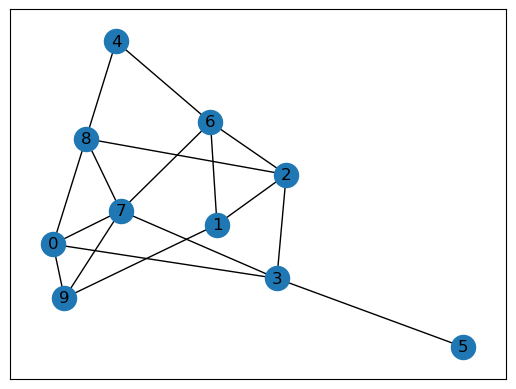

In [82]:
DrawNetwork(G, "gap1.png")

In [91]:
E0 = sorted_E[0]
E1 = sorted_E[2]

In [92]:
print(E1-E0)

1.0


In [90]:
ground = sorted_vec[0]
print(ground)
first = sorted_vec[2]
print(first)

[0 1 1 0 1 0 1 0 1 0]
[0 1 1 0 1 1 1 0 0 0]


In [93]:
original = NumberCutEdges(ground, G)
print(original)
swap = NumberCutEdges(first, G)    
print(swap)

5
6


## Gap = 0.25

One swap and minus one cut edge $(\alpha - \beta)$

In [133]:
G = RandomGraphGenerator(n, p)
NetworkToFile(G, "gap025.txt")
Q =QMatrix("gap025.txt", alpha, beta)
num_sols, xmin, Egap, sorted_E, sorted_vec = QUBOSolution2(Q, 1e-2)

In [134]:
print(Egap)
print(num_sols)

0.25
2


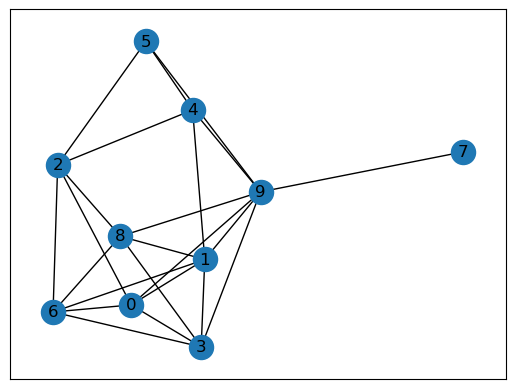

In [135]:
DrawNetwork(G, "gap025.png")

In [139]:
E0 = sorted_E[0]
E1 = sorted_E[2]

In [140]:
print(E1-E0)

0.25


In [141]:
ground = sorted_vec[0]
print(ground)
first = sorted_vec[2]
print(first)

[0 0 1 0 1 1 0 1 0 1]
[0 0 0 0 1 1 0 1 0 1]


In [142]:
original = NumberCutEdges(ground, G)
print(original)
swap = NumberCutEdges(first, G)    
print(swap)

8
7


## Gap = 0.75

Three swaps and minus two cut edges $(3*\alpha - 2*\beta)$

In [5]:
G = RandomGraphGenerator(n, p)
NetworkToFile(G, "gap075.txt")
Q =QMatrix("gap075.txt", alpha, beta)
num_sols, xmin, Egap, sorted_E, sorted_vec = QUBOSolution2(Q, 1e-2)

In [6]:
print(Egap)
print(num_sols)

0.75
2


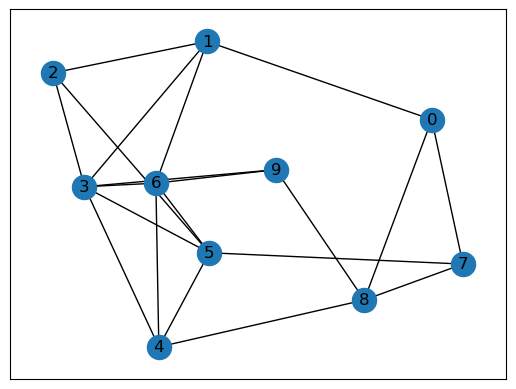

In [7]:
DrawNetwork(G, "gap075.png")

In [8]:
E0 = sorted_E[0]
E1 = sorted_E[2]

In [9]:
print(E1-E0)

0.75


In [10]:
ground = sorted_vec[0]
print(ground)
first = sorted_vec[2]
print(first)

[1 0 0 0 0 0 0 1 1 1]
[0 0 0 1 1 1 1 0 0 1]


In [11]:
original = NumberCutEdges(ground, G)
print(original)
swap = NumberCutEdges(first, G)    
print(swap)

5
7


In [14]:
ground = sorted_vec[1]
print(ground)
first = sorted_vec[2]
print(first)

[0 1 1 1 1 1 1 0 0 0]
[0 0 0 1 1 1 1 0 0 1]


In [15]:
original = NumberCutEdges(ground, G)
print(original)
swap = NumberCutEdges(first, G)    
print(swap)

5
7
